# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
uom = "metric"
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {"q": city,
              "appid": weather_api_key,
              "units":uom}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(url, params=params)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boguchany
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | upington
Processing Record 9 of Set 1 | cururupu
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | cimitarra
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | al bawiti
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | nadi
Processing Record 21 of Set 1 | kodinsk
Processing Record 22 of Set 1 | sitka
Processing Record 23 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boguchany,58.3814,97.4531,-0.72,90,100,4.46,RU,1731298656
1,waitangi,-43.9535,-176.5597,15.46,88,98,2.68,NZ,1731298431
2,bethel,41.3712,-73.4140,12.47,88,100,1.34,US,1731298374
3,new norfolk,-42.7826,147.0587,19.84,18,1,0.80,AU,1731298659
4,albany,42.6001,-73.9662,8.25,72,100,0.45,US,1731298107


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,-0.72,90,100,4.46,RU,1731298656
1,waitangi,-43.9535,-176.5597,15.46,88,98,2.68,NZ,1731298431
2,bethel,41.3712,-73.4140,12.47,88,100,1.34,US,1731298374
3,new norfolk,-42.7826,147.0587,19.84,18,1,0.80,AU,1731298659
4,albany,42.6001,-73.9662,8.25,72,100,0.45,US,1731298107


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

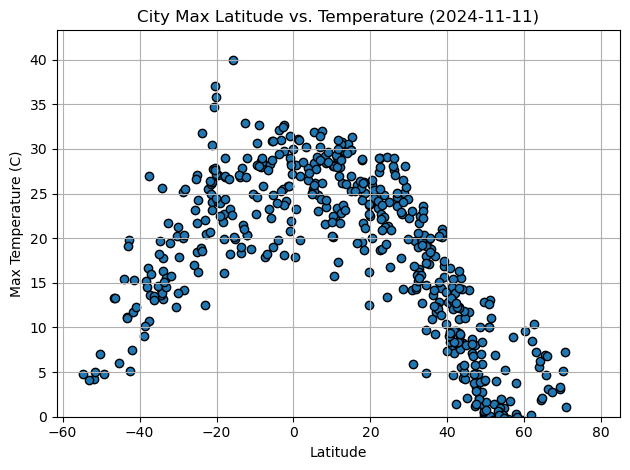

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"], 
    marker="o", 
    color="tab:blue",   # Markers face color
    edgecolor="k")      # Markers edge color

# Date Unix Timestamp conversion
date = pd.to_datetime(city_data_df['Date'].min(), unit="s").strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.ylim(bottom=0)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

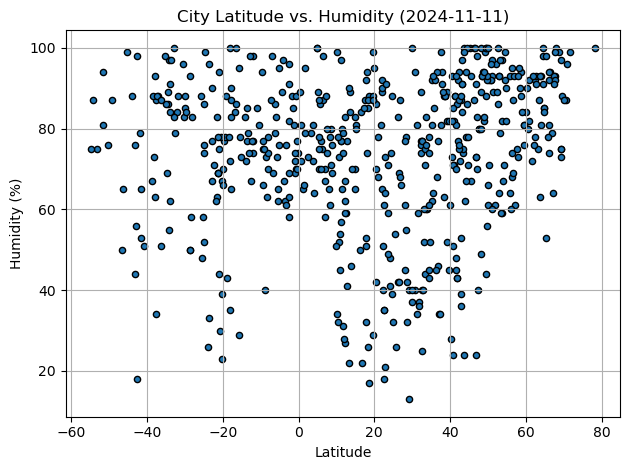

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Humidity",
    marker="o", 
    grid=True,
    color= "tab:blue",
    edgecolor="k",)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

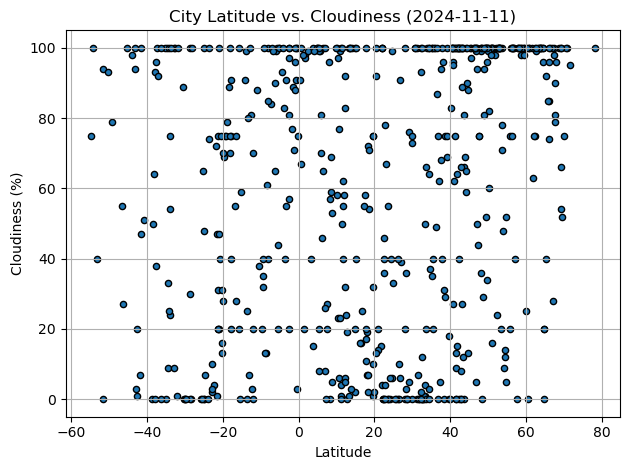

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Cloudiness",
    marker="o", 
    grid=True,
    color= "tab:blue",
    edgecolor="k",)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

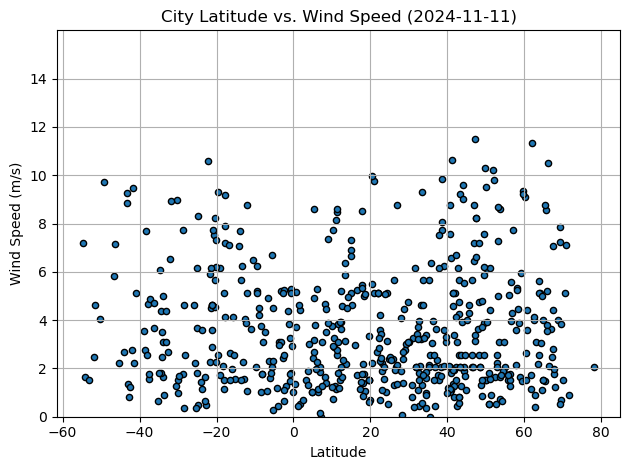

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Wind Speed",
    marker="o", 
    grid=True,
    color= "tab:blue",
    edgecolor="k",)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim(0, 16)
plt.yticks(range(0,15, 2))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [171]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, eqn_coordinates=None, xlabel=None, ylabel=None, title="Linear Regression Plot"):

    # Linear Regression parameters
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regression_values = slope * x + intercept
    line_equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared =rvalue**2
    print(f"The r^2-value is: {r_squared:.2f}")

    # Scatter plot
    plt.scatter(x, y, color="tab:blue")
    plt.plot(x, regression_values, "r-")

    # Line equation annotations
    if not eqn_coordinates:
        eqn_coordinates =(x.min(), y.min())
    plt.annotate(line_equation, eqn_coordinates, color="red")

    # Graph properties
    plt.xlabel(xlabel if xlabel else x.name)
    plt.ylabel(ylabel if ylabel else y.name)
    plt.title(title)
    plt.tight_layout

    # Show plot
    plt.show()

In [181]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >=0,:]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,-0.72,90,100,4.46,RU,1731298656
2,bethel,41.3712,-73.4140,12.47,88,100,1.34,US,1731298374
4,albany,42.6001,-73.9662,8.25,72,100,0.45,US,1731298107
5,isafjordur,66.0755,-23.1240,3.12,81,85,10.50,IS,1731298440
6,longyearbyen,78.2186,15.6401,-2.09,100,100,2.06,SJ,1731298663


In [182]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,15.46,88,98,2.68,NZ,1731298431
3,new norfolk,-42.7826,147.0587,19.84,18,1,0.80,AU,1731298659
7,upington,-28.4478,21.2561,14.21,58,0,4.63,ZA,1731298664
8,cururupu,-1.8283,-44.8683,24.19,88,77,1.29,BR,1731298665
9,adamstown,-25.0660,-130.1015,21.70,76,100,3.69,PN,1731298393


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.79


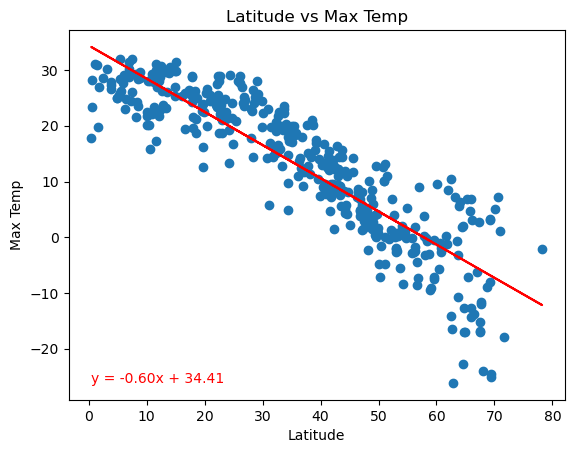

In [183]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'],
                       northern_hemisphere_df['Max Temp'],

# Graph properties
xlabel='Latitude',
ylabel='Max Temp',
title='Latitude vs Max Temp')

# Show Plot
plt.show()

The r^2-value is: 0.56


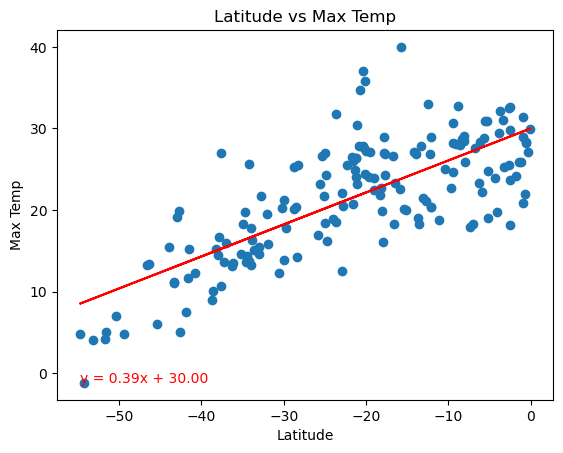

In [184]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemisphere_df['Lat'],
                       southern_hemisphere_df['Max Temp'],

# Graph properties
xlabel='Latitude',
ylabel='Max Temp',
title='Latitude vs Max Temp')

# Show Plot
plt.show()

**Discussion about the linear relationship:** Based on the linear regression between the latitudes and max temperatures above, it appears that in the Northern Hemisphere, the latitudes and maximum temperatures have a strong inverse relationship, showing that as the latitude increases, the maximum temperatures tend to decrease. On the other hand, in the Southern Hemisphere, although the relationship is somewhat evident between the maximum temperatures and the latitude decrease, the relationship is not as strong compared to the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.09


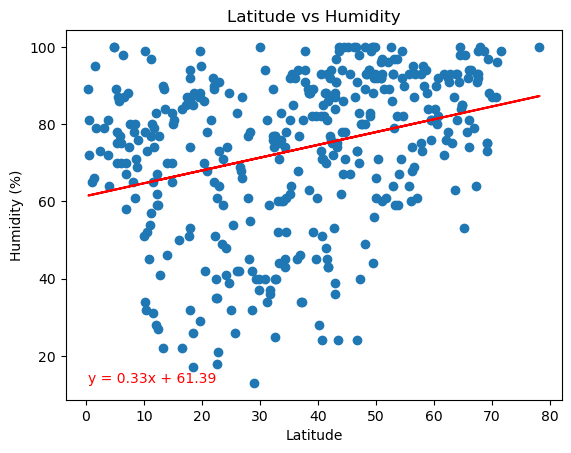

In [187]:
# Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'],
                       northern_hemisphere_df['Humidity'],

# Graph properties
xlabel='Latitude',
ylabel='Humidity (%)',
title='Latitude vs Humidity')

# Show Plot
plt.show()

The r^2-value is: 0.00


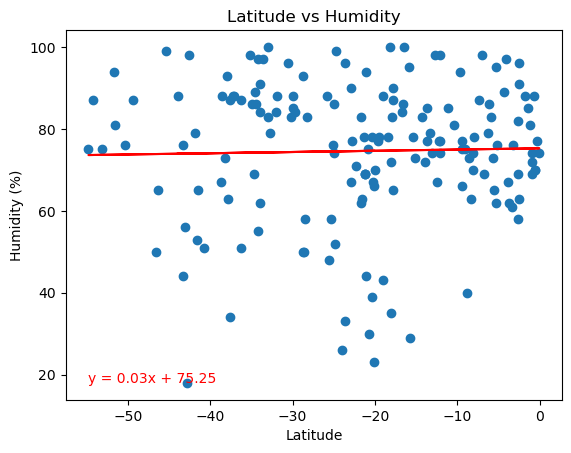

In [188]:
# Southern Hemisphere
linear_regression_plot(southern_hemisphere_df['Lat'],
                       southern_hemisphere_df['Humidity'],

# Graph properties
xlabel='Latitude',
ylabel='Humidity (%)',
title='Latitude vs Humidity')

# Show Plot
plt.show()

**Discussion about the linear relationship:** Based on the linear regression between the latitudes and humidity above, it appears that in both the Northern and Southern Hemispheres, there is a moderate upward trend between the two, suggesting that humidity tends to increase as latitude increases in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.09


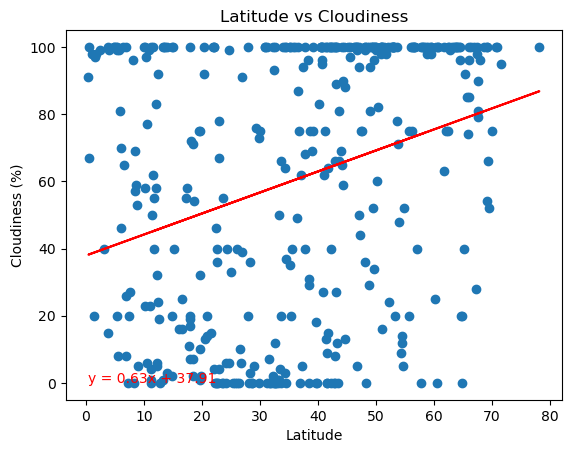

In [194]:
# Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'],
                       northern_hemisphere_df['Cloudiness'],

# Graph properties
xlabel='Latitude',
ylabel='Cloudiness (%)',
title='Latitude vs Cloudiness')

# Show Plot
plt.show()

The r^2-value is: 0.02


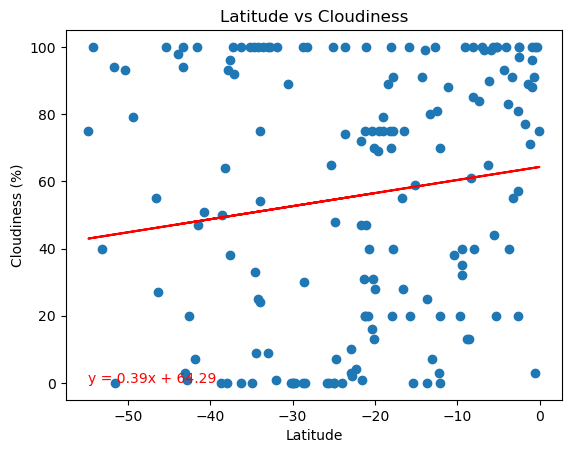

In [195]:
# Southern Hemisphere
linear_regression_plot(southern_hemisphere_df['Lat'],
                       southern_hemisphere_df['Cloudiness'],

# Graph properties
xlabel='Latitude',
ylabel='Cloudiness (%)',
title='Latitude vs Cloudiness')

# Show Plot
plt.show()

**Discussion about the linear relationship:** Based on the linear regression between the latitudes and cloudiness above, there is a weak but positive relationship in both the Northern and Southern Hemispheres, suggesting a slight tendency for cloudiness to increase as latitude rises in each hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01


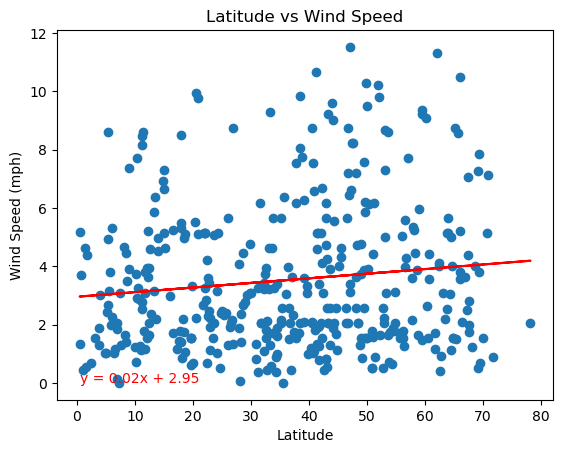

In [196]:
# Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'],
                       northern_hemisphere_df['Wind Speed'],

# Graph properties
xlabel='Latitude',
ylabel='Wind Speed (mph)',
title='Latitude vs Wind Speed')

# Show Plot
plt.show()

The r^2-value is: 0.02


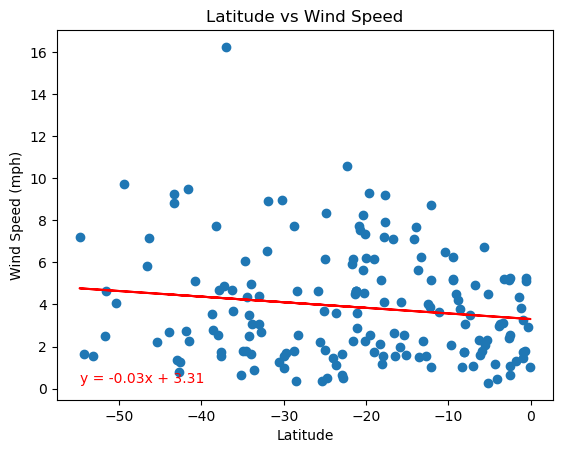

In [197]:
# Southern Hemisphere
linear_regression_plot(southern_hemisphere_df['Lat'],
                       southern_hemisphere_df['Wind Speed'],

# Graph properties
xlabel='Latitude',
ylabel='Wind Speed (mph)',
title='Latitude vs Wind Speed')

# Show Plot
plt.show()

**Discussion about the linear relationship:** Based on the linear regression between the latitudes and wind speed above, there is a weak positive relationship in the Northern Hemisphere, as wind speed slightly increases as latitude rises. On the other hand, in the Southern Hemisphere, there is a weak inverse relationship where wind speed is likely to decrease slightly as latitude moves away from the equator. 